In [1]:
from PIL import Image
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
path_to_dataset = '../data/dataset/'
train_images_folder = os.path.join(path_to_dataset, 'train_images')
train_table_path = os.path.join(path_to_dataset, 'train.csv')

In [3]:
train_table = pd.read_csv(train_table_path).fillna(-1)

In [4]:
train_table.head(15)

,ImageId_ClassId,EncodedPixels
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0002cc93b.jpg_2,-1
2,0002cc93b.jpg_3,-1
3,0002cc93b.jpg_4,-1
4,00031f466.jpg_1,-1
5,00031f466.jpg_2,-1
6,00031f466.jpg_3,-1
7,00031f466.jpg_4,-1
8,000418bfc.jpg_1,-1
9,000418bfc.jpg_2,-1


In [5]:
def rleToMask(rleString,height,width):
    rows, cols = height, width
    if rleString == -1:
        return np.zeros((height, width))
    else:
        rleNumbers = [int(numstring) for numstring in rleString.split(' ')]
        rlePairs = np.array(rleNumbers).reshape(-1,2)
        img = np.zeros(rows*cols,dtype=np.uint8)
        for index,length in rlePairs:
            index -= 1
            img[index:index+length] = 255
            img = img.reshape(cols,rows)
            img = img.T
        return img

In [6]:
channels_data = {}
for img_id_class, data in train_table.values:
    img_id, channel_class = img_id_class.split('_')
    
    if img_id not in channels_data.keys():
        channels_data[img_id] = {}
    
    channels_data[img_id][int(channel_class)] = data

In [14]:
images_names_list = list(set(map(lambda x: x.split('_')[0], train_table.values[:, 0])))
i = 0
images_names_list[i], channels_data[images_names_list[i]]

('2a7f8bab0.jpg',
 {1: -1,
  2: '114376 16 114602 46 114827 78 115052 109 115278 139 115503 170 115729 201 115969 217 116225 217 116481 217 116737 218 116993 218 117249 202 117505 171 117761 140 118017 109 118273 78 118529 47 118785 16',
  3: -1,
  4: -1})

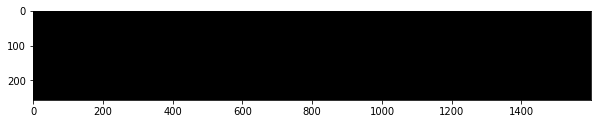

In [20]:
plt.figure(figsize=(10, 10))
plt.imshow(rleToMask(channels_data[images_names_list[i]][2], 256, 1600), 'gray')
plt.show()